In [1]:
import numpy as np

# Input features (4 samples, 2 features)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype=np.float32)

# XOR outputs
y = np.array([[0], [1], [1], [0]], dtype=np.float32)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(2, activation='tanh', input_shape=(2,)),  # Hidden layer
    Dense(1, activation='sigmoid')                   # Output layer
])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X, y, epochs=1000, verbose=0)



In [6]:
predictions = model.predict(X)
print("Predicted probabilities:")
print(predictions)

print("Predicted classes:")
print((predictions > 0.5).astype(int))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted probabilities:
[[0.1590623]
 [0.4529297]
 [0.8506321]
 [0.5339115]]
Predicted classes:
[[0]
 [0]
 [1]
 [1]]


**PyTorch:**

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim


In [8]:
class XORNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 2)
        self.output = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.tanh(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x


In [9]:
X_torch = torch.tensor(X)
y_torch = torch.tensor(y)

model = XORNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [10]:
for epoch in range(1000):
    optimizer.zero_grad()

    outputs = model(X_torch)
    loss = criterion(outputs, y_torch)

    loss.backward()      # backpropagation
    optimizer.step()     # weight update


In [11]:
with torch.no_grad():
    preds = model(X_torch)
    print((preds > 0.5).int())


tensor([[0],
        [1],
        [1],
        [0]], dtype=torch.int32)


**Tensorflow**

In [12]:
W1 = tf.Variable(tf.random.normal([2, 2]))
b1 = tf.Variable(tf.zeros([2]))

W2 = tf.Variable(tf.random.normal([2, 1]))
b2 = tf.Variable(tf.zeros([1]))


In [13]:
def forward(X):
    hidden = tf.tanh(tf.matmul(X, W1) + b1)
    output = tf.sigmoid(tf.matmul(hidden, W2) + b2)
    return output


In [14]:
optimizer = tf.optimizers.Adam(learning_rate=0.01)

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred))


In [15]:
for epoch in range(1000):
    with tf.GradientTape() as tape:
        preds = forward(X)
        loss = loss_fn(y, preds)

    grads = tape.gradient(loss, [W1, b1, W2, b2])
    optimizer.apply_gradients(zip(grads, [W1, b1, W2, b2]))


In [16]:
preds = forward(X)
print((preds.numpy() > 0.5).astype(int))


[[0]
 [1]
 [1]
 [1]]


In [17]:
# Create a grid of points
xx, yy = np.meshgrid(
    np.linspace(-0.5, 1.5, 300),
    np.linspace(-0.5, 1.5, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]


In [19]:
with torch.no_grad():
    # Convert grid to a PyTorch tensor
    grid_torch = torch.tensor(grid, dtype=torch.float32)

    # Predict probabilities using the PyTorch model
    Z_torch = model(grid_torch)

    # Convert the output tensor to a NumPy array
    Z = Z_torch.numpy()

# Convert probabilities to class labels
Z = (Z > 0.5).astype(int)

# Reshape to match grid shape
Z = Z.reshape(xx.shape)

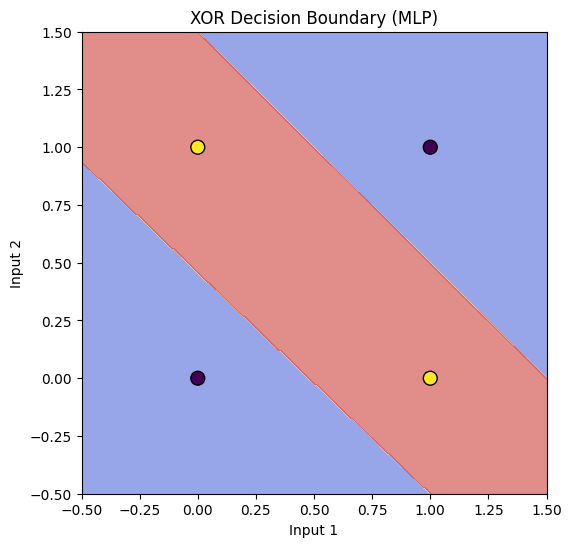

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.6, cmap='coolwarm')

# Plot original XOR points
plt.scatter(X[:,0], X[:,1], c=y.flatten(), edgecolors='k', s=100)

plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("XOR Decision Boundary (MLP)")
plt.show()
